In [34]:
import torch
import matplotlib.pyplot as plt
import numpy as np

from config_v3 import *
from dataclass import *
import augmentations
from model import *

In [35]:
def get_difference(tensor_image_1, tensor_image_2):
    image_1 = tensor_image_1.detach().numpy()
    image_2 = tensor_image_2.detach().numpy()

    difference = image_1 - image_2
    return torch.from_numpy(difference)

In [36]:
def plot_images_side_by_side(images_array, image_names):
    n = len(images_array)
    _, ax = plt.subplots(1, n, figsize=(18, 8))
    for i in range(n):
        ax[i].set_title(image_names[i])
        ax[i].imshow(images_array[i])
    plt.tight_layout()

In [37]:
def visualize_images(dataset, n=5):
    rand_indices = [np.random.randint(0, len(dataset)) for i in range(n)]
    for index in rand_indices:
        lr, hr, _ = dataset[index]
        residual = get_difference(hr, lr)
        lr = lr.cpu().detach().numpy().transpose(1,2,0)
        hr = hr.cpu().detach().numpy().transpose(1,2,0)
        residual = residual.cpu().detach().numpy().transpose(1,2,0)
        plot_images_side_by_side([lr, hr, residual], ["Low Resolution", "High Resolution", "Residual"])

In [38]:
config = Configuration()

train_transforms = transforms.Compose([
        # augmentations.RandomCrop(config.IMAGE_SIZE),
        augmentations.RandomRotation(360),
        augmentations.RandomHorizontalFlip(0.5),
        augmentations.RandomVerticalFlip(0.5),
        augmentations.MaxNormalize()
    ])

valid_transforms = transforms.Compose([
    # augmentations.CenterCrop(config.IMAGE_SIZE), 
    augmentations.MaxNormalize()
])


train_dataset = BicubicDataset(config.TRAIN_PATH, image_transforms=train_transforms)
valid_dataset = BicubicDataset(config.VALID_PATH, image_transforms=valid_transforms)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


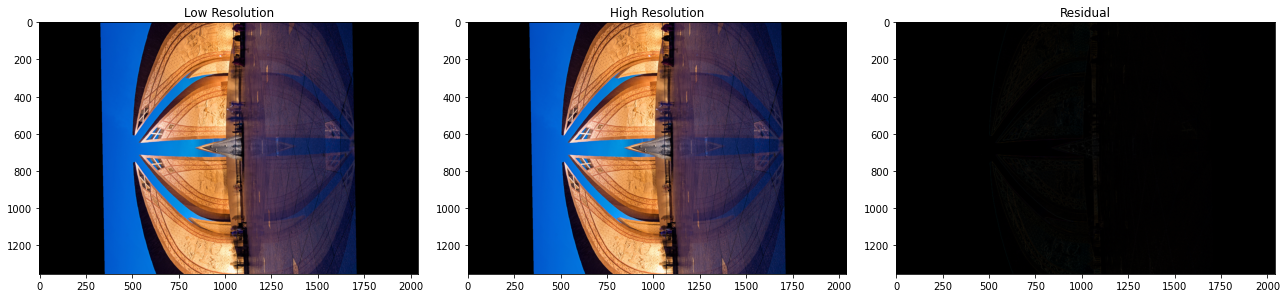

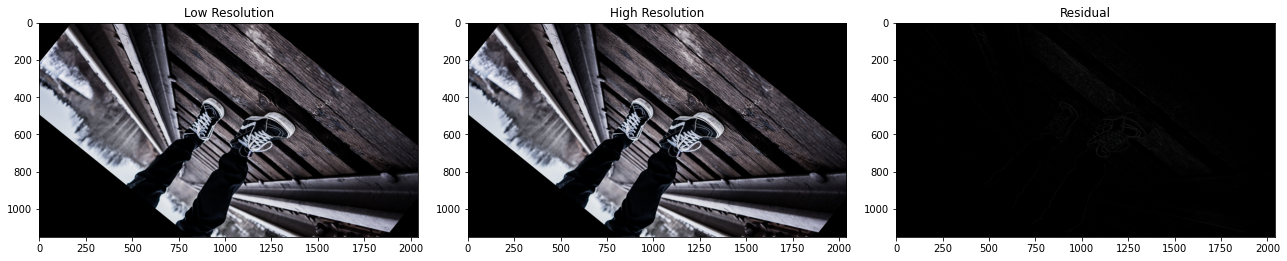

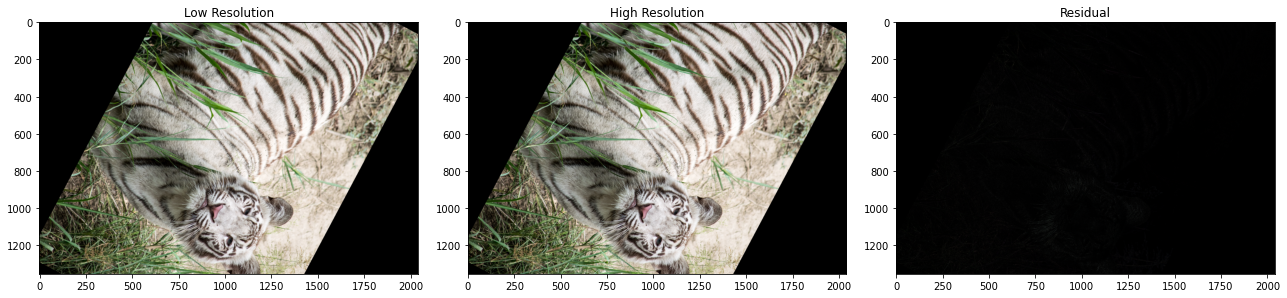

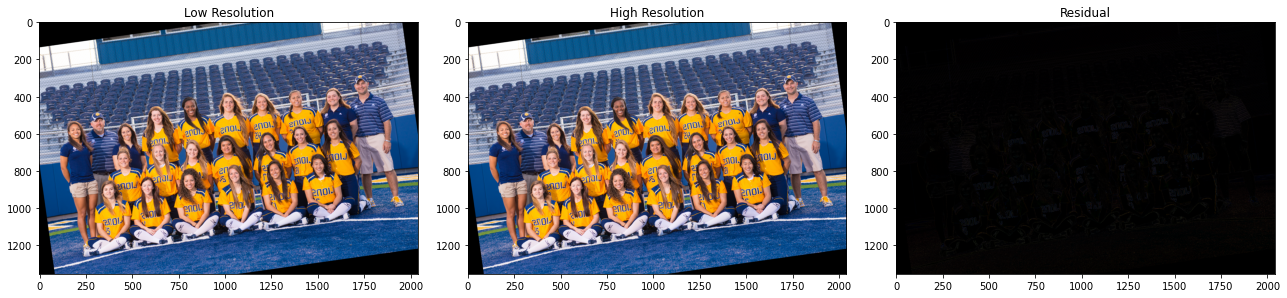

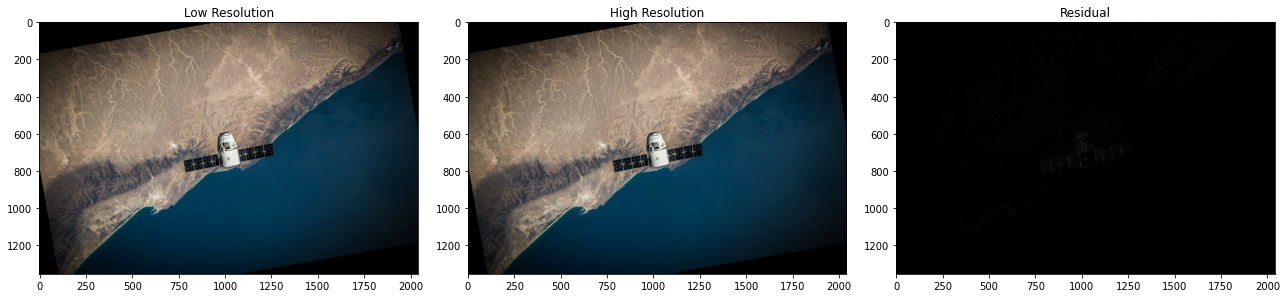

In [40]:
visualize_images(train_dataset, 5)